# Example Application

This example application is from a shaking table test at the University of Bristol SoFSI laboratory.

The test involves the fixed-base response of a bridge pier.

## Import data

### Libraries

In [1]:
import sys
sys.path.append('../src')
import pydysp
import matplotlib.pyplot as plt

### Information

In [2]:
# Test Information
directory = "example_2_data"
filenames = [
    "./"+directory+"/S015-001_1000Hz.mat",
    "./"+directory+"/S015-002_1000Hz.mat",
    "./"+directory+"/S015-003_1000Hz.mat",
]
test_descriptions = [
    "1-50Hz Noise, 0.01g",
    "1-50Hz Noise, 0.02g",
    "1-50Hz Noise, 0.03g",
]

In [3]:
# Channel information
channel_names = []
channel_descriptions = [
    "Time",
    "Strain N1 (bottom)",
    "Strain N2",
    "Strain N3",
    "Strain N4",
    "Strain N5 (top)",
    "Strain P1 (bottom)",
    "Strain P2",
    "Strain P3",
    "Strain P4",
    "Strain P5 (top)",
    "Acc X bottom",
    "Acc Y bottom",
    "Acc X top",
    "Acc Y top",
    "Acc X table",
]
units = [
    "s",
    "u","u","u","u","u",
    "u","u","u","u","u",
    "g","g","g","g","g","-",
]
calibrations = [
    1,
    1000,1000,1000,1000,1000,
    1000,1000,1000,1000,1000,
    0.25,0.25,0.25,0.25,0.25,
] #V/unit

### Data Import

In [4]:
# Create tests
test = [pydysp.test.Test() for _ in enumerate(filenames)]
for i,i_test in enumerate(test):
    i_test.read_sofsi(filename=filenames[i])
    i_test.set_test_info(description=test_descriptions[i])
    i_test.set_channel_info(descriptions=channel_descriptions, units=units, calibrations=calibrations)
    i_test.baseline_correct()

## Printing and plotting

In [5]:
# Typical test information
info_test = test[0].get_test_info()

Name: S015-001_1000Hz
Description: 1-50Hz Noise, 0.01g
Filename: ./example_2_data/S015-001_1000Hz.mat
Time: 08/03/2024 11:30:16
Number of Channels: 33
Channel Names:
  0: Time__1_-_default_sample_rate , Time
  1: NX_1bottom , Strain N1 (bottom)
  2: NX_2 , Strain N2
  3: NX_3 , Strain N3
  4: NX_4 , Strain N4
  5: NX_5top , Strain N5 (top)
  6: PX_1bottom , Strain P1 (bottom)
  7: PX_2 , Strain P2
  8: PX_3 , Strain P3
  9: PX_4 , Strain P4
  10: PX_5top , Strain P5 (top)
  11: X_accel_bottom , Acc X bottom
  12: Y_accel_bottom , Acc Y bottom
  13: X_accel_top , Acc X top
  14: Y_accel_top , Acc Y top
  15: X-accel_table , Acc X table
  16: Sync , No channel description
  17: Time__4_-_default_sample_rate , No channel description
  18: SoFSI_49to64_CH_1 , No channel description
  19: SoFSI_49to64_CH_2 , No channel description
  20: SoFSI_49to64_CH_3 , No channel description
  21: SoFSI_49to64_CH_4 , No channel description
  22: SoFSI_49to64_CH_5 , No channel description
  23: SoFSI_49t

In [6]:
# Typical channel information
info_channel = test[0].channel[15].get_channel_info()

Name: X-accel_table
Description: Acc X table
Unit: g
Calibration: 0.25
Timestep: 0.0010000000474974513
Points: 67226


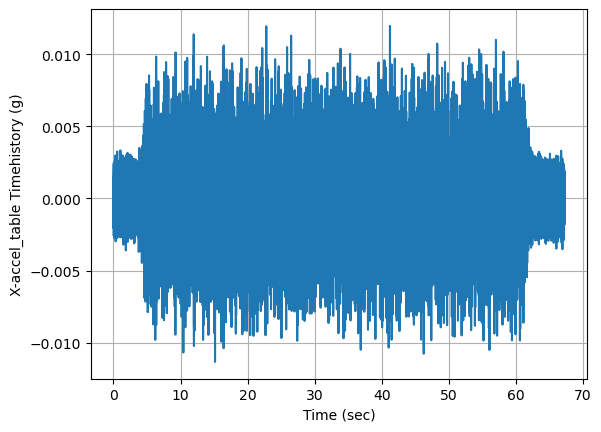

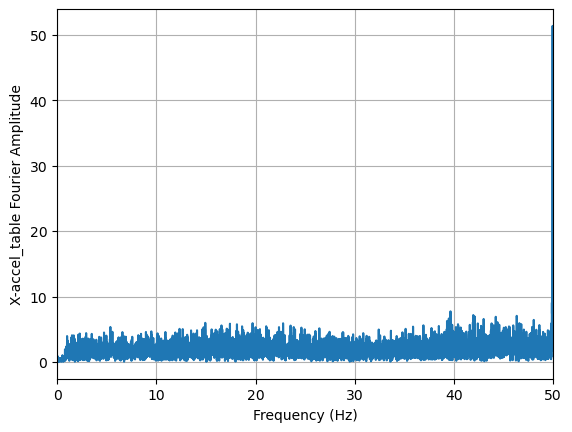

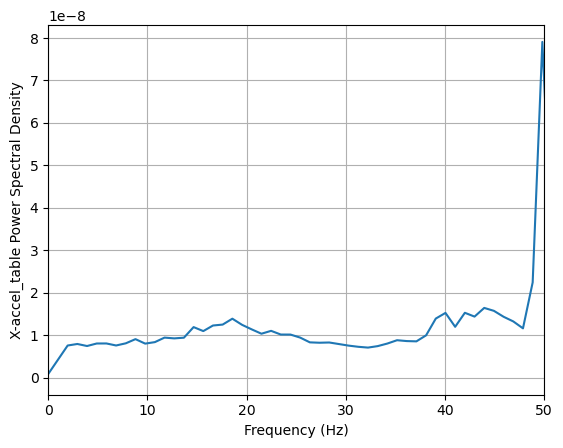

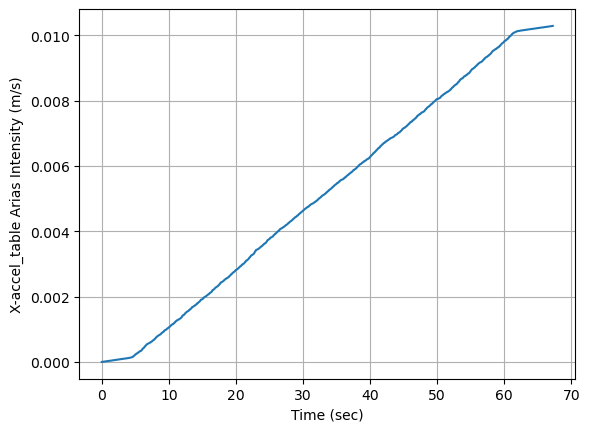

In [7]:
# Typical channel plots
ax = test[0].channel[15].plot(plot_type="Timehistory")
ax = test[0].channel[15].plot(plot_type="Fourier")
ax = test[0].channel[15].plot(plot_type="Power", nperseg=1024)
ax = test[0].channel[15].plot(plot_type="Arias")

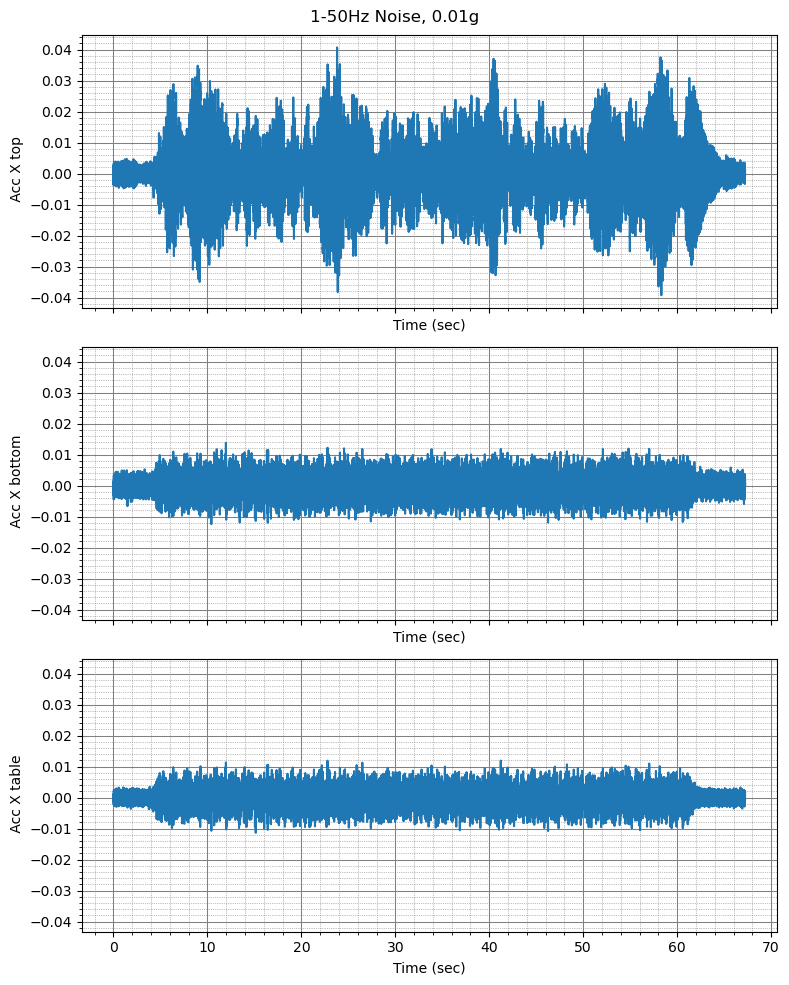

In [8]:
# Typical test plots
ax = test[0].plot(channels=[13,11,15], columns=1, plot_type="Timehistory") #same inputs as above
# Plot formatting
ax[0].figure.set_size_inches(8,10)
ax[0].minorticks_on()
for a in ax:
    a.grid(which='major', linestyle='-', linewidth=0.75, color='gray')
    a.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

In [9]:
# Collecting information from multiple tests
for t in test:
    th=t.channel[13].timehistory()[1]
    print(f"{t.description}: t_max = {th[0]:.3f}, a_max = {th[1]:.3f}")

1-50Hz Noise, 0.01g: t_max = 23.801, a_max = 0.041
1-50Hz Noise, 0.02g: t_max = 58.135, a_max = 0.073
1-50Hz Noise, 0.03g: t_max = 41.061, a_max = 0.134


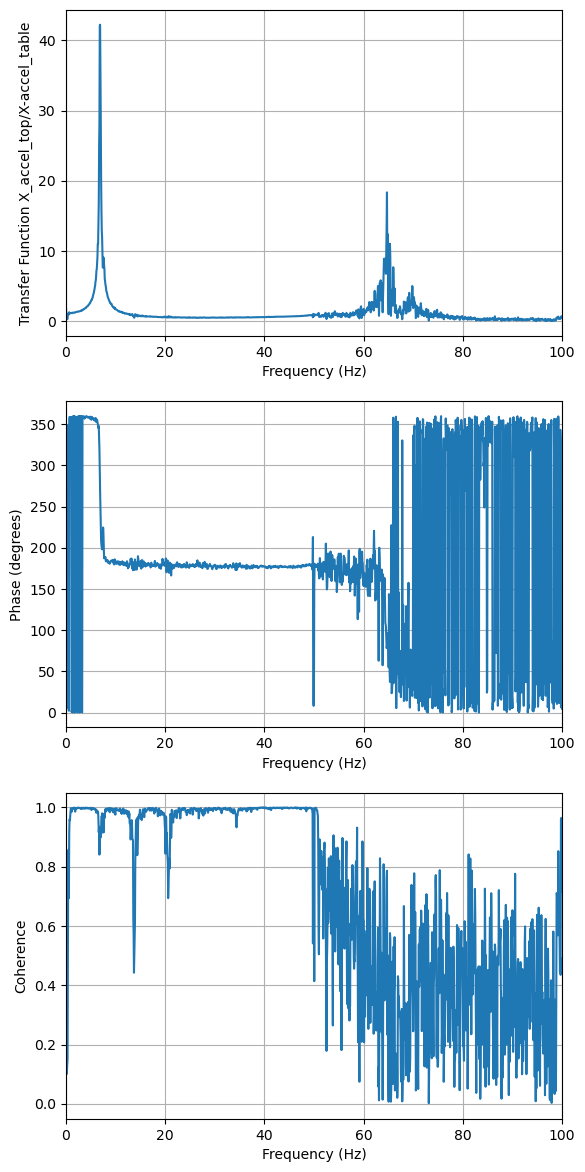

In [10]:
# Plotting a single transfer function
[_,[f,t,_,_,_,_],_,_] = test[0].transfer_function(channel_from=15, channel_to=13, xlim=100)

1-50Hz Noise, 0.01g: fn = 6.89, ksi = 0.018
1-50Hz Noise, 0.02g: fn = 6.66, ksi = 0.026
1-50Hz Noise, 0.03g: fn = 6.39, ksi = 0.032


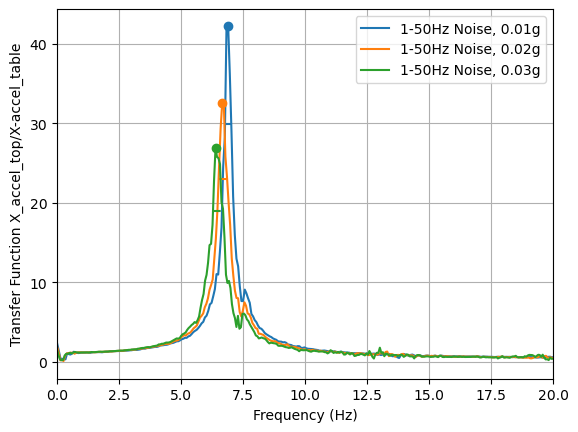

In [11]:
# Plotting multiple transfer functions
fix1,ax1 = plt.subplots()
for t in test:
    tf=t.transfer_function(channel_from=15, channel_to=13, axis=ax1, find_peak=True, find_damping=True, xlim=20)
    # Printing information from multiple tests
    print(f"{t.description}: fn = {tf[2][0]:.2f}, ksi = {tf[3]:.3f}")
leg=ax1.legend()

In [12]:
# Export data
for t in test:
    #t.export_to_csv(filename = t.filename.split("\\")[-1].split(".")[0]+".csv")
    pass

## Further work

### Vibration Toolbox
Experimental Modal Analysis (EMA) using the [Engineering Vibration Toolbox](https://vibrationtoolbox.github.io/) (VTB).

In [13]:
import numpy as np
import vibration_toolbox as vtb

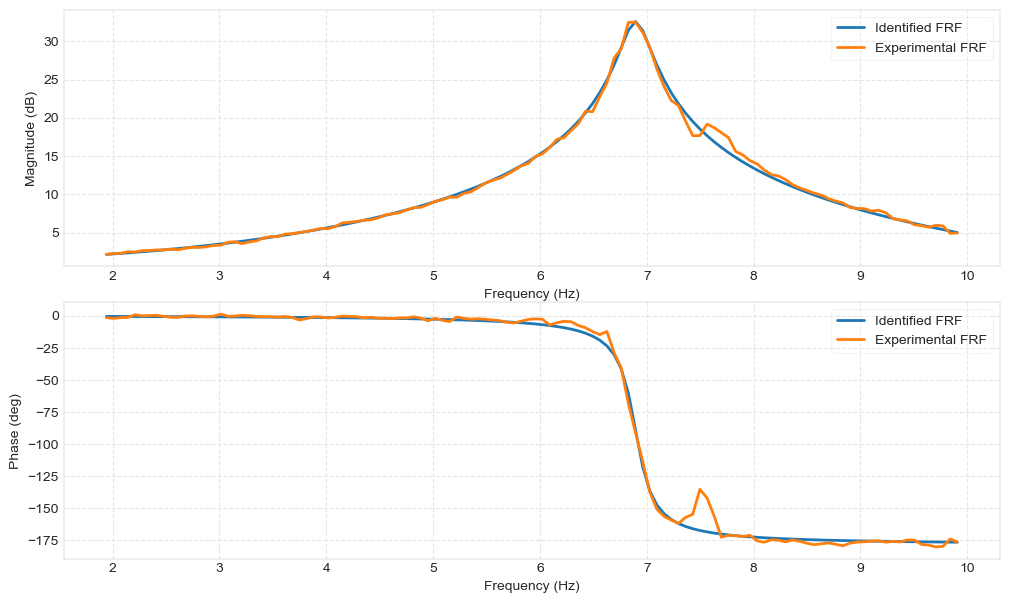

(0.017715275888517786, 6.895541229099923, 1.5083885726008217)

In [14]:
[_,[f,tf,_,_,_,_],_,_]=test[0].transfer_function(channel_from=15, channel_to=13, axis=[])
# f and tf must be converted to vectors
F = np.array([f]).T
TF = np.array([tf]).T
# fmin and fmax must be given as integers
dF = f[1]-f[0]
fmin = int(2/dF)
fmax = int(10/dF)
# vtb.ema
vtb.ema.sdof_cf(F,TF,fmin,fmax)
# Returns: damping, natural frequency, numerator of identified transfer functions

### SDyPy-EMA
Experimental Modal Analysis using [SDyPy-EMA](https://github.com/sdypy/sdypy-EMA).

In [15]:
from sdypy import EMA

In [16]:
[_,[f,tf,_,_,_,_],_,_]=test[0].transfer_function(channel_from=15, channel_to=13, axis=[])
# Create model
ema_model = EMA.Model(
    tf,
    f,
    lower=1,
    upper=80,
    pol_order_high=50
    )
# Analyse
ema_model.get_poles()
ema_model.select_poles()
ema_model.print_modal_data()
H,A = ema_model.get_constants(method='lsfd')

  0%|                                                                        | 0/50 [00:00<?, ?it/s]c:\Users\dimit\anaconda3\lib\site-packages\sdypy\EMA\EMA.py:357: RuntimeWarning: invalid value encountered in log
  poles = -np.log(sr) / self.sampling_time
100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 244.92it/s]


   Nat. f.      Damping
-----------------------
1)    6.9	0.0172
2)   64.7	0.0069


<Figure size 1000x600 with 0 Axes>

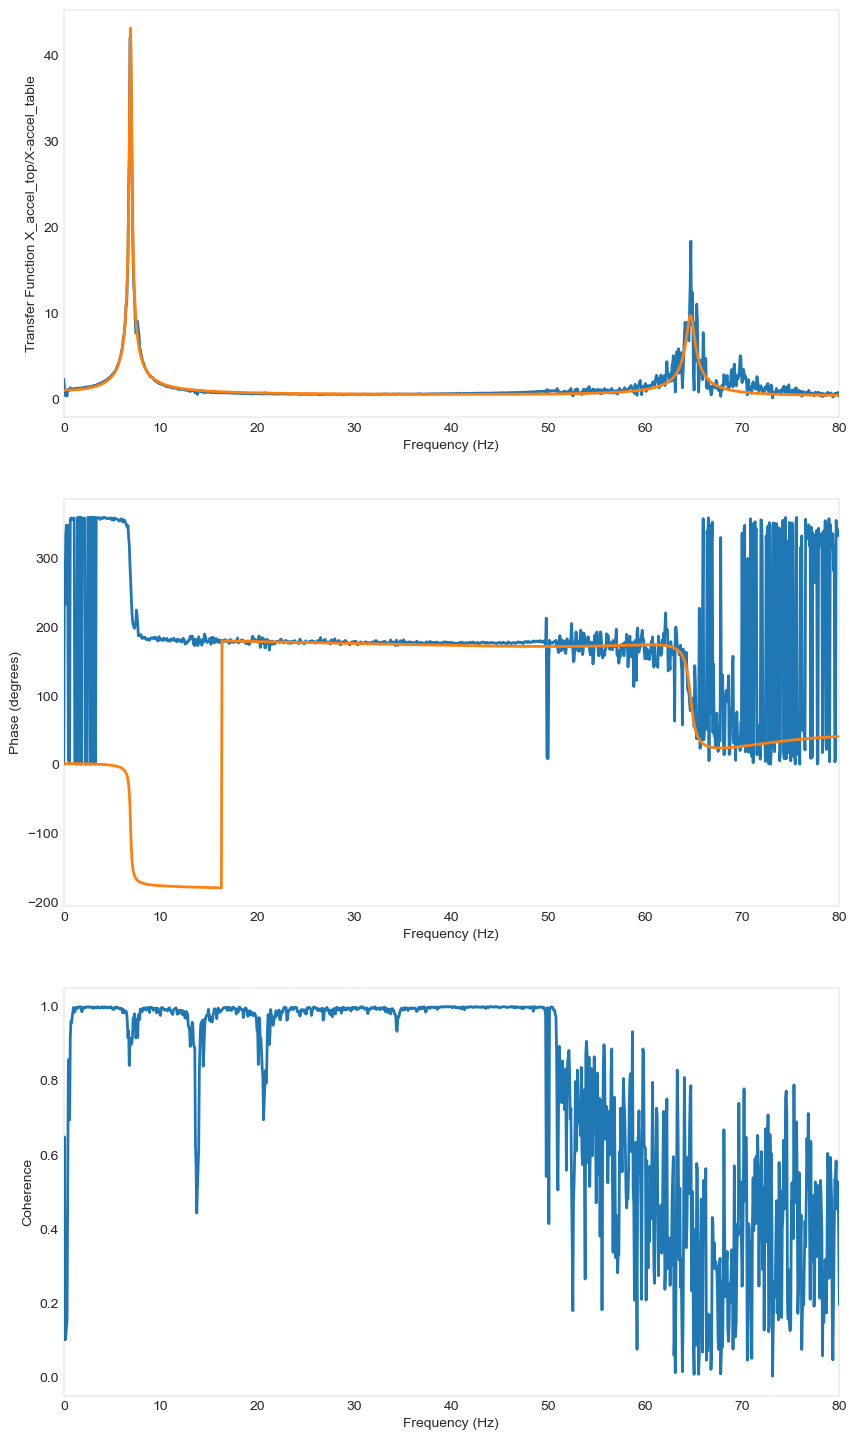

In [17]:
[axes,_,_,_]=test[0].transfer_function(channel_from=15, channel_to=13, xlim=80)
axes[0].plot(ema_model.freq, np.abs(H[0]))
axes[1].plot(ema_model.freq, np.angle(H[0])*180/np.pi)